# Random Seed Experiment Results

In [1]:
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from db import conn

In [2]:
%matplotlib inline

In [3]:
sns.set_style("whitegrid")

In [4]:
cursor = conn.cursor()
experiment_rows = [r for r in cursor.execute("""
    select g.name, args, dev_metric, test_metric from experiments e
    join experiment_groups g on e.group_id=g.gid
    where g.name=?""", ('random-seed-test',))]

In [5]:
len(experiment_rows)

30

In [6]:
experiment_results = {
    'trecqa': [],
    'wikiqa': [],
    'sick': []
}

for row in experiment_rows:
    args = json.loads(row[1])
    dev_metrics = json.loads(row[2])
    test_metrics = json.loads(row[3])
    dataset = args['dataset']
    
    res_base = {
        'dataset': dataset,
        'seed': args['seed']
    }
    
    results = []
    
    if dataset in ('trecqa', 'wikiqa'):
        results.append({**res_base, **{'split': 'dev', 'metric_name': 'MAP', 'metric_val': dev_metrics['map']}})
        results.append({**res_base, **{'split': 'dev', 'metric_name': 'MRR', 'metric_val': dev_metrics['mrr']}})
        results.append({**res_base, **{'split': 'test', 'metric_name': 'MAP', 'metric_val': test_metrics['map']}})
        results.append({**res_base, **{'split': 'test', 'metric_name': 'MRR', 'metric_val': test_metrics['mrr']}})
    elif dataset == 'sick':
        results.append({**res_base, **{'split': 'dev', 'metric_name': 'pearson', 'metric_val': dev_metrics['pearson']}})
        results.append({**res_base, **{'split': 'dev', 'metric_name': 'spearman', 'metric_val': dev_metrics['spearman']}})
        results.append({**res_base, **{'split': 'test', 'metric_name': 'pearson', 'metric_val': test_metrics['pearson']}})
        results.append({**res_base, **{'split': 'test', 'metric_name': 'spearman', 'metric_val': test_metrics['spearman']}})
    
    experiment_results[dataset].extend(results)

In [7]:
trecqa = pd.DataFrame(experiment_results['trecqa'])
wikiqa = pd.DataFrame(experiment_results['wikiqa'])
sick = pd.DataFrame(experiment_results['sick'])

In [8]:
trecqa

,dataset,metric_name,metric_val,seed,split
0,trecqa,MAP,0.7700,846249,dev
1,trecqa,MRR,0.8106,846249,dev
2,trecqa,MAP,0.7740,846249,test
3,trecqa,MRR,0.8258,846249,test
4,trecqa,MAP,0.7909,118095,dev
5,trecqa,MRR,0.8495,118095,dev
6,trecqa,MAP,0.7985,118095,test
7,trecqa,MRR,0.8291,118095,test
8,trecqa,MAP,0.7858,639104,dev
9,trecqa,MRR,0.8400,639104,dev


/u3/z3tu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


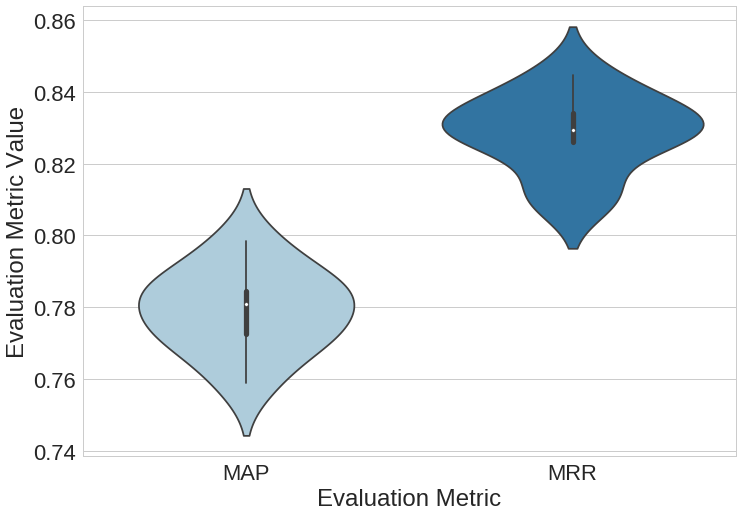

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.violinplot(x='metric_name', y='metric_val', scala='count', palette='Paired', data=trecqa[trecqa['split'] == 'test'], ax=ax)
# ax.set(xlabel='', ylabel='Evaluation Metric Value', fontsize=40)
plt.xlabel('Evaluation Metric', fontsize=24)
plt.ylabel('Evaluation Metric Value', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(prop={'size': 22})
fig.savefig('random_seed_mpcnn_trecqa.pdf')

In [22]:
import scipy.stats as st
import statsmodels.stats.api as sms

/u3/z3tu/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [27]:
trecqa_test_map = trecqa[(trecqa['split'] == 'test') & (trecqa['metric_name'] == 'MAP')]['metric_val']
trecqa_test_mrr = trecqa[(trecqa['split'] == 'test') & (trecqa['metric_name'] == 'MRR')]['metric_val']

In [32]:
# print(st.t.interval(0.95, len(trecqa_test_map)-1, loc=np.mean(trecqa_test_map), scale=st.sem(trecqa_test_map)))
interval = sms.DescrStatsW(trecqa_test_map).tconfint_mean()
map_mean = np.mean(trecqa_test_map)
print(interval)
print(interval[1] - map_mean, map_mean - interval[0])

(0.77105097810262868, 0.78756902189737121)
0.00825902189737 0.00825902189737


In [33]:
sms.DescrStatsW(trecqa_test_mrr).tconfint_mean()

(0.82076404569610384, 0.83613595430389642)